In [1]:
#This is classification algorithm where we have amargin diving the data

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [5]:
churn = pd.read_csv("churn_data.csv.xls")

In [6]:
churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
churn.shape

(7042, 9)

In [8]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   tenure            7042 non-null   int64  
 2   PhoneService      7042 non-null   object 
 3   Contract          7042 non-null   object 
 4   PaperlessBilling  7042 non-null   object 
 5   PaymentMethod     7042 non-null   object 
 6   MonthlyCharges    7042 non-null   float64
 7   TotalCharges      7042 non-null   object 
 8   Churn             7042 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB


In [9]:
churn.describe()

,tenure,MonthlyCharges
count,7042.000000,7042.000000
mean,32.366373,64.755886
std,24.557955,30.088238
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


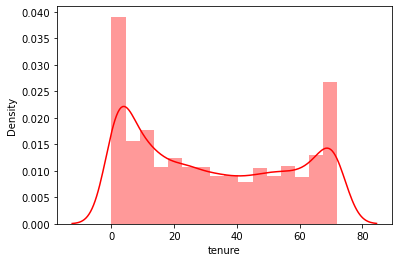

In [12]:
sns.distplot(churn["tenure"],color = "red")
plt.show;

In [13]:
churn["PaperlessBilling"].value_counts()

Yes    4170
No     2872
Name: PaperlessBilling, dtype: int64

Text(0.5, 1.0, 'paperless billing')

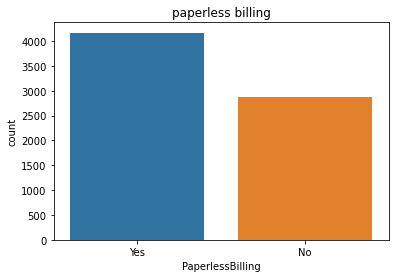

In [15]:
sns.countplot(x="PaperlessBilling",data = churn)
plt.title("paperless billing")

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

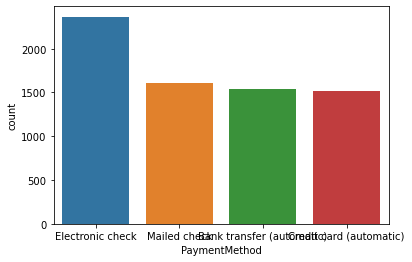

In [17]:
sns.countplot(x="PaymentMethod",data = churn)

In [18]:
churn["Contract"].value_counts()

Month-to-month    3875
Two year          1694
One year          1473
Name: Contract, dtype: int64

<AxesSubplot:xlabel='Contract', ylabel='count'>

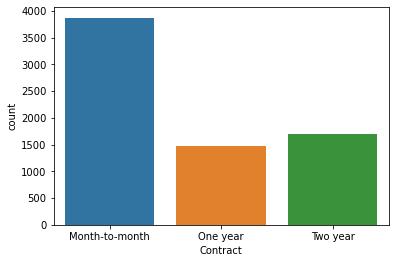

In [19]:
sns.countplot(x="Contract",data = churn)

<AxesSubplot:xlabel='Churn', ylabel='count'>

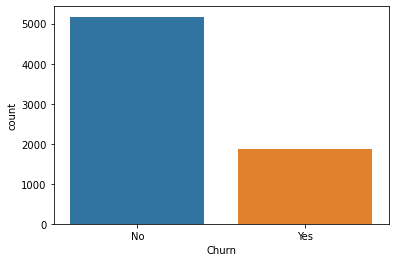

In [21]:
sns.countplot(x="Churn",data = churn)

In [22]:
X=churn[["tenure"]]
y=churn[["Churn"]]

In [23]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.25)

In [35]:
from sklearn.svm import SVC

In [72]:
svc=SVC()
#kernel ={'linear','poly','rbf' etc}

In [73]:
svc.fit(X_train,y_train)

/Users/kokildhakal/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [74]:
y_pred = svc.predict(X_test)

In [75]:
from sklearn.metrics import confusion_matrix

In [76]:
confusion_matrix(y_test,y_pred)

array([[1153,  119],
       [ 312,  177]])

In [77]:
(1153+177)/(1153+177+312+119)

0.7552526973310619

In [78]:
# Evaluate the SVM on the test set
accuracy = svc.score(X_test, y_test)
print(f"Test set accuracy:{accuracy*100}%")

Test set accuracy:75.5252697331062%
